In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
df = pd.read_csv('heart.csv')

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

Direct Logistic Regression

In [35]:
X, y = df.drop('target', axis=1), df['target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

In [75]:
X_test.shape

(308, 13)

<Axes: >

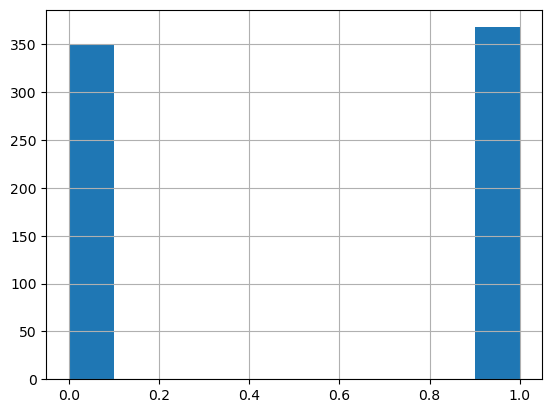

In [76]:
y_train.hist()

In [77]:
model = LogisticRegression(max_iter=20000)

In [78]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

In [79]:
y_pred = model.predict(X_test)

In [80]:
score = accuracy_score(y_test, y_pred)

In [81]:
score

0.8246753246753247

In [82]:
confusion_matrix(y_test, y_pred)

array([[112,  38],
       [ 16, 142]], dtype=int64)

In [83]:
X_train.max() - X_train.min()

age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
dtype: float64

Testing Logistic Regression with StandardScaling

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=42, test_size=0.3)

In [104]:
scaler = StandardScaler()
scaler.fit(X_train[['age', 'trestbps', 'chol', 'thalach']])

StandardScaler()

In [105]:
X_train[['age', 'trestbps', 'chol', 'thalach']] = scaler.transform(X_train[['age', 'trestbps', 'chol', 'thalach']])
X_test[['age', 'trestbps', 'chol', 'thalach']] = scaler.transform(X_test[['age', 'trestbps', 'chol', 'thalach']])

In [106]:
model = LogisticRegression(max_iter=50000)

In [107]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=50000)

In [108]:
y_pred = model.predict(X_test)

In [109]:
score = accuracy_score(y_test, y_pred)

In [110]:
score

0.8051948051948052

In [111]:
confusion_matrix(y_test, y_pred)

array([[119,  40],
       [ 20, 129]], dtype=int64)